# Final Project - Data Science Engineering Methods and Tools

# Topic - Global Average Temperature Forecasting

Team Members - Ayush Gupta - 001554875, Janhavi Patil - 001523317 , Yash Bhodia - 001090359

<img src="https://media3.giphy.com/media/9lbsXFEP1NSEFAvFCj/giphy.gif?cid=ecf05e47dx7jzdt1mqn1xklwrrmv8mbslz7gtt7nnqed0nwy&rid=giphy.gif&ct=g" width="400" height="400" />

Motivation - Climate change in the world can be caused by various activities. When climate change occurs; temperatures can increase a dramatically. When temperature rises, many different changes can occur on Earth. For example, it can result in more floods, droughts, or intense rain, as well as more frequent and severe heat waves. Oceans and glaciers have also experienced some changes: oceans are warming and becoming more acidic, glaciers are melting, and sea levels are rising. As these changes frequently occur in future decades, they will likely present challenges to our society and environment

In [1]:
# necessary imports
%matplotlib inline
import plotly
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import plotly.graph_objects as go
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')

# Lets do some Exploaratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.


<img src="https://cdn-images-1.medium.com/max/1094/0*x1zBLby0DoFDGa8v" width="400" height="600" />

In [2]:
# loading the dataset into a dataframe
df = pd.read_csv('/Users/janhavi/Desktop/citytemperature.csv')
df.tail(10)

Region Country                   State                  City  \
2906317  North America      US  Additional Territories  San Juan Puerto Rico   
2906318  North America      US  Additional Territories  San Juan Puerto Rico   
2906319  North America      US  Additional Territories  San Juan Puerto Rico   
2906320  North America      US  Additional Territories  San Juan Puerto Rico   
2906321  North America      US  Additional Territories  San Juan Puerto Rico   
2906322  North America      US  Additional Territories  San Juan Puerto Rico   
2906323  North America      US  Additional Territories  San Juan Puerto Rico   
2906324  North America      US  Additional Territories  San Juan Puerto Rico   
2906325  North America      US  Additional Territories  San Juan Puerto Rico   
2906326  North America      US  Additional Territories  San Juan Puerto Rico   

         Month  Day  Year  AvgTemperature  
2906317      7   22  2013            80.9  
2906318      7   23  2013            83.1  
2906319      7   24  2013            83.2  
2906320      7   25  2013            83.7  
2906321      7   26  2013            82.4  
2906322      7   27  2013            82.4  
2906323      7   28  2013            81.6  
2906324      7   29  2013            84.2  
2906325      7   30  2013            83.8  
2906326      7   31  2013            83.6

In [3]:
# getting basic information about the data
def all_about_my_data(df):
    print("Here is some Basic Ground Info about your Data:\n")
    
    # Shape of the dataframe
    print("Number of Instances:",df.shape[0])
    print("Number of Features:",df.shape[1])
    
    # Summary Stats
    print("\nSummary Stats:")
    print(df.describe())
    
    # Missing Value Inspection
    print("\nMissing Values:")
    print(df.isna().sum())

all_about_my_data(df)

Here is some Basic Ground Info about your Data:

Number of Instances: 2906327
Number of Features: 8

Summary Stats:
              Month           Day          Year  AvgTemperature
count  2.906327e+06  2.906327e+06  2.906327e+06    2.906327e+06
mean   6.469163e+00  1.571682e+01  2.006624e+03    5.600492e+01
std    3.456489e+00  8.800534e+00  2.338226e+01    3.212359e+01
min    1.000000e+00  0.000000e+00  2.000000e+02   -9.900000e+01
25%    3.000000e+00  8.000000e+00  2.001000e+03    4.580000e+01
50%    6.000000e+00  1.600000e+01  2.007000e+03    6.250000e+01
75%    9.000000e+00  2.300000e+01  2.013000e+03    7.550000e+01
max    1.200000e+01  3.100000e+01  2.020000e+03    1.100000e+02

Missing Values:
Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64


Observation - Since the number of NA values in State column is large (1450990) and insignificant, we drop it 

In [4]:
df = df.drop(df.columns[2], axis=1) 
df.head(10)

Region  Country     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria  Algiers      1    1  1995            64.2
1  Africa  Algeria  Algiers      1    2  1995            49.4
2  Africa  Algeria  Algiers      1    3  1995            48.8
3  Africa  Algeria  Algiers      1    4  1995            46.4
4  Africa  Algeria  Algiers      1    5  1995            47.9
5  Africa  Algeria  Algiers      1    6  1995            48.7
6  Africa  Algeria  Algiers      1    7  1995            48.9
7  Africa  Algeria  Algiers      1    8  1995            49.1
8  Africa  Algeria  Algiers      1    9  1995            49.0
9  Africa  Algeria  Algiers      1   10  1995            51.9

# Box Plots - 
A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.

Plotting a box plot of avg temp to check if there are any outliers present

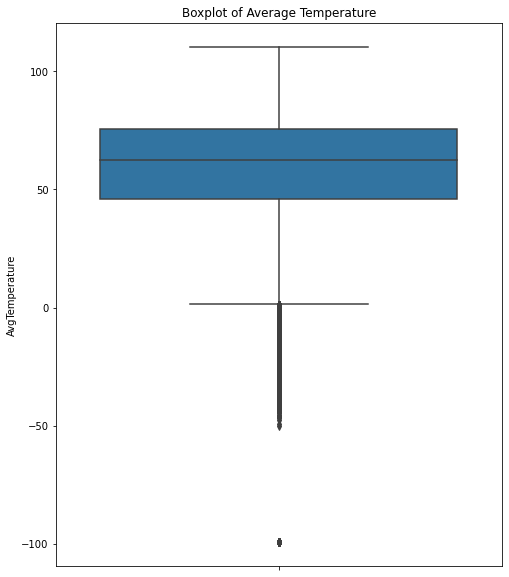

In [5]:
plt.figure(figsize = (8,10))
sns.boxplot(data = df,y = 'AvgTemperature')
_=plt.title("Boxplot of Average Temperature")

Outliers are present and can be seen in the figure above, hence we chose all the rows having 'AvgTemperature' greater than -50°F

In [6]:
df = df[df['AvgTemperature']>-50]
df

Region  Country                  City  Month  Day  Year  \
0               Africa  Algeria               Algiers      1    1  1995   
1               Africa  Algeria               Algiers      1    2  1995   
2               Africa  Algeria               Algiers      1    3  1995   
3               Africa  Algeria               Algiers      1    4  1995   
4               Africa  Algeria               Algiers      1    5  1995   
...                ...      ...                   ...    ...  ...   ...   
2906322  North America       US  San Juan Puerto Rico      7   27  2013   
2906323  North America       US  San Juan Puerto Rico      7   28  2013   
2906324  North America       US  San Juan Puerto Rico      7   29  2013   
2906325  North America       US  San Juan Puerto Rico      7   30  2013   
2906326  North America       US  San Juan Puerto Rico      7   31  2013   

         AvgTemperature  
0                  64.2  
1                  49.4  
2                  48.8  
3                  46.4  
4                  47.9  
...                 ...  
2906322            82.4  
2906323            81.6  
2906324            84.2  
2906325            83.8  
2906326            83.6  

[2826654 rows x 7 columns]

Sorted the data-  year, month and day wise 

In [7]:
df.sort_values(['Year','Month','Day'])

Region                   Country         City  Month  Day  \
0               Africa                   Algeria      Algiers      1    1   
13809           Africa                     Benin      Cotonou      1    1   
23075           Africa  Central African Republic       Bangui      1    1   
32341           Africa                     Congo  Brazzaville      1    1   
41606           Africa                     Egypt        Cairo      1    1   
...                ...                       ...          ...    ...  ...   
2862479  North America                        US    Green Bay      5   13   
2871744  North America                        US      Madison      5   13   
2881009  North America                        US    Milwaukee      5   13   
2890274  North America                        US       Casper      5   13   
2899539  North America                        US     Cheyenne      5   13   

         Year  AvgTemperature  
0        1995            64.2  
13809    1995            81.2  
23075    1995            75.3  
32341    1995            79.9  
41606    1995            59.2  
...       ...             ...  
2862479  2020            38.5  
2871744  2020            45.7  
2881009  2020            41.2  
2890274  2020            54.1  
2899539  2020            48.5  

[2826654 rows x 7 columns]

Observation - The data spans from 1995 - 2020

# Line Plots

This a type of plot which displays information as a series of data points called “markers” connected by straight lines. In this type of plot, we need the measurement points to be ordered (typically by their x-axis values). This type of plot is often used to visualize a trend in data over intervals of time - a time series.
To make a line plot with Matplotlib, we call plt.plot(). The first argument is used for the data on the horizontal axis, and the second is used for the data on the vertical axis. This function generates your plot, but it doesn’t display it. To display the plot, we need to call the plt.show() function. This is nice because we might want to add some additional customizations to our plot before we display it. 

Plotting Average Temperature of different continents from 1995 to 2020

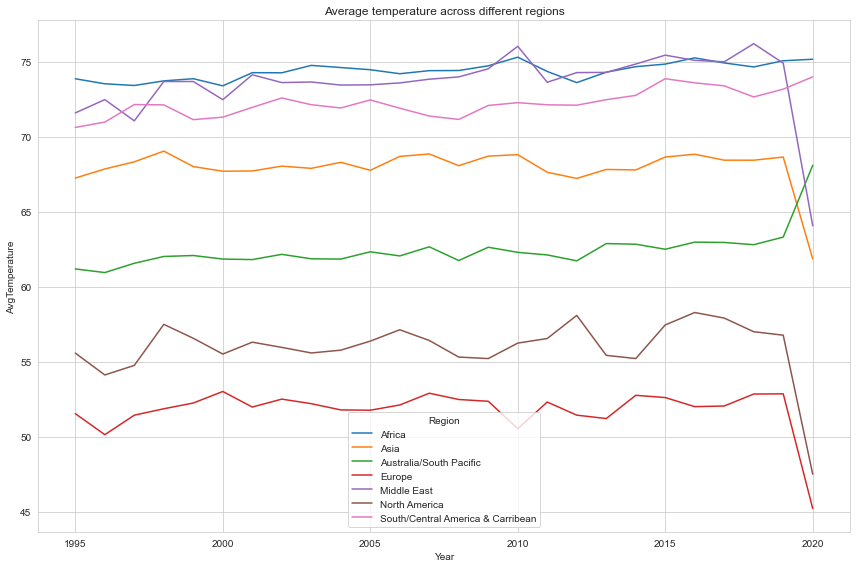

In [8]:
data = df[['Region','AvgTemperature','Year']].groupby(['Region','Year']).mean()
data = data.reset_index(level=0)

#plotting
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.lineplot(data=data,hue='Region',x='Year',y='AvgTemperature')
_=plt.title('Average temperature across different regions')
plt.tight_layout()

The data spans from Jan 1995 to May 2020

Since 2020 is incomplete, let's strip it off for the current analysis

In [9]:
df1 = df[df['Year']<2020]

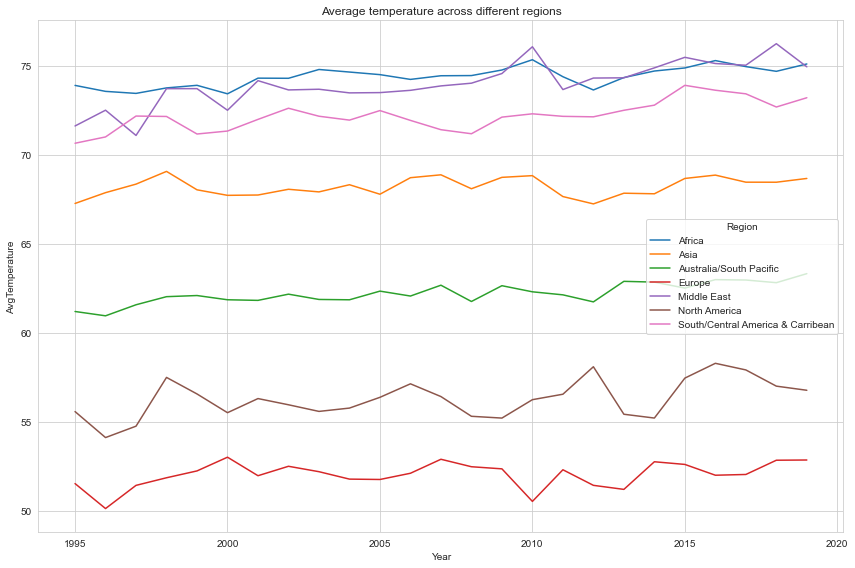

In [10]:
data = df1[['Region','AvgTemperature','Year']].groupby(['Region','Year']).mean()
data = data.reset_index(level=0)

#plotting
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.lineplot(data=data,hue='Region',x='Year',y='AvgTemperature')
_=plt.title('Average temperature across different regions')
plt.tight_layout()

Observation - Africa and Middle east are the hottest regions, and Europe is the coldest

Plotting yearly average temperature graphs for different regions

In [11]:
#Preparing data
data = df[['Region','Month','AvgTemperature']]
data = data.groupby(['Region','Month']).mean()

#labelled numbers month wise
months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:"Dec"}
data = data.reset_index(level=1)

#Changing the month label from integer to name
data['Month'] = data.loc[:,'Month'].map(months)
data.head(20)

Month  AvgTemperature
Region                      
Africa   Jan       72.565024
Africa   Feb       73.756690
Africa   Mar       74.747041
Africa   Apr       74.942885
Africa   May       75.001612
Africa   Jun       74.388472
Africa   Jul       73.998977
Africa   Aug       74.487920
Africa   Sep       75.363312
Africa   Oct       75.956732
Africa   Nov       74.587523
Africa   Dec       73.072468
Asia     Jan       51.105208
Asia     Feb       54.910247
Asia     Mar       62.241779
Asia     Apr       69.949163
Asia     May       75.949478
Asia     Jun       79.788095
Asia     Jul       81.593747
Asia     Aug       80.848345

# Bar Plots

It represents categorical data with rectangular bars. Each bar has a height corresponds to the value it represents. It’s useful when we want to compare a given numeric value on different categories. In a nutshell, A bar chart shows values as vertical bars, where the position of each bar indicates the value it represents. matplot aims to make it as easy as possible to turn data into Bar Charts.

In [12]:
#plotting
regions = df['Region'].unique()
plot_holder = []

# colors for bars representing different continents
colors = ['green','red','firebrick','blue','teal','black','orange']

# iterating over regions
for i,region in enumerate(regions):
    plot = go.Bar(x=data.loc[region,'Month'],y=data.loc[region,'AvgTemperature'],name=region,visible = (i==0),marker_color=colors[i])
    plot_holder.append(plot)
fig = go.Figure(data = plot_holder)

buttons = [dict(label=region,method='update',args=[{'title':region,'visible':[True if j==i else False for j in range(len(regions))]}]) for i,region in enumerate(regions)]
updatemenus = list([
    dict(
    buttons=buttons,
    yanchor='top',
    xanchor='left')
])
fig.update_layout(updatemenus=updatemenus)


Observation - Africa and Central America has nearly the same average temperature throught the year, Australia shows a reverse trend than others


Displaying the highest and lowest recorded temperature in this dataset (1995 to 2020)

In [13]:
data1=df.sort_values(by=['AvgTemperature'],ascending=False).head(1)
data2=df.sort_values(by=['AvgTemperature'],ascending=True).head(1)
data = pd.concat([data1,data2],)
data.index = ['Highest','Lowest']
data

Region Country       City  Month  Day  Year  AvgTemperature
Highest    Middle East  Kuwait     Kuwait      8    1  2012           110.0
Lowest   North America      US  Fairbanks      2    5  1999           -49.1

In [14]:
px.scatter_geo(lat=[29.3117,64.8378],lon=[29.3117,147.7164],text=['Kuwait','Fairbanks'],size=[0.5,0.5],color=[110,-50],color_continuous_scale='bluered')


Top 5 coldest and hottest countries overall

In [15]:
data = df[['Country','AvgTemperature']].groupby('Country').mean().sort_values('AvgTemperature')
print('The top five coldest countries in the world are: ',data.index[:5].to_list())
print('The top five hottest countries in the world are: ',data.index[-5:].to_list())

The top five coldest countries in the world are:  ['Mongolia', 'Iceland', 'Norway', 'Canada', 'Finland']
The top five hottest countries in the world are:  ['Guyana', 'Indonesia', 'Thailand', 'Nigeria', 'Haiti']


Plot - Top five coldest countries over the years

In [16]:
data = df[['Country','Year','AvgTemperature']].groupby(['Year','Country']).mean().sort_values('AvgTemperature').reset_index()
data = data.groupby('Year').apply(lambda group: group.iloc[:5]).reset_index(drop=True)
px.choropleth(data_frame=data,locationmode='country names',locations='Country',color='AvgTemperature',animation_frame='Year',title="Top five coldest countries over the years")

Plot - Top five hottest countries over the years

In [17]:
data = df[['Country','Year','AvgTemperature']].groupby(['Year','Country']).mean().sort_values('AvgTemperature',ascending=False).reset_index()
data = data.groupby('Year').apply(lambda group: group.iloc[:5]).reset_index(drop=True)
px.choropleth(data_frame=data,locationmode='country names',locations='Country',color='AvgTemperature',animation_frame='Year',title="Top five hottest countries over the years")

# Forecasting

<img src="https://64.media.tumblr.com/542d72a3b0e5bdeed3d2f6572e76d8dd/tumblr_or8o2ark7v1qejocno1_500.gifv" width="400" height="400" />

In [18]:
# filtering to get only INDIA data
data = df[df['Country'] == 'India']

# filtering to get only Bombay data
bom = data.loc[data['City'] == 'Bombay (Mumbai)',['Month','Day','Year','AvgTemperature']].reset_index(drop=True)
bom.head(10)

Month  Day  Year  AvgTemperature
0      1    1  1995            71.8
1      1    2  1995            72.0
2      1    3  1995            70.3
3      1    4  1995            69.7
4      1    5  1995            71.3
5      1    6  1995            73.9
6      1    7  1995            72.9
7      1    8  1995            70.2
8      1    9  1995            68.4
9      1   10  1995            68.0

Check if temperature is recorded everyday properly

In [19]:
# joining day, month and year together
bom['Date'] = bom[['Year','Month','Day']].apply(lambda row:'-'.join([str(row['Year']),str(row['Month']),str(row['Day'])]),axis=1)
bom['Date'] = pd.to_datetime(bom['Date'])
bom = bom.drop(columns=['Month','Day','Year']).set_index('Date')
bom.head(10)

AvgTemperature
Date                      
1995-01-01            71.8
1995-01-02            72.0
1995-01-03            70.3
1995-01-04            69.7
1995-01-05            71.3
1995-01-06            73.9
1995-01-07            72.9
1995-01-08            70.2
1995-01-09            68.4
1995-01-10            68.0

In [20]:
bom.to_csv(r'/Users/janhavi/Desktop/city_temperature_bombay.csv')

In [21]:
# Plot of average temperature of the city of Paris (1995-2019)

px.line(data_frame=bom,color_discrete_sequence=['teal'],title="Daily Average Temperature - Bombay (1995-2019)")

In [22]:
bom_monthly = bom.resample('M').mean()
bom_monthly.head()

AvgTemperature
Date                      
1995-01-31       72.393548
1995-02-28       76.214286
1995-03-31       79.393333
1995-04-30       84.120000
1995-05-31       86.819355

In [23]:
bom_monthly.tail(5)

AvgTemperature
Date                      
2020-01-31       77.222581
2020-02-29       81.855172
2020-03-31       82.132258
2020-04-30       86.376667
2020-05-31       87.238462

In [24]:
bom_monthly.shape[0]

305

# Augmented Dickey Fuller Test
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.The statsmodel package provides a reliable implementation of the ADF test via the adfuller() function in statsmodels.tsa.stattools. It returns the following outputs:

1. The p-value
2. The value of the test statistic
3. Number of lags considered for the test
4. The critical value cutoffs

When the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that the time series is stationary. Alright, let’s run the ADF test on the a10 dataset from the fpp package from R. This dataset counts the total monthly scripts for pharmaceutical products falling under ATC code A10. The original source of this dataset is the Australian Health Insurance Commission. As see earlier, the null hypothesis of the test is the presence of unit root, that is, the series is non-stationary.

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
# using pre defined adfuller to get the necessary values
adf = adfuller(x=bom['AvgTemperature'])
print('pvalue:',adf[1])
print('adf:',adf[0])
print('usedlag:',adf[2])
print('nobs:',adf[3])
print('critical_values:',adf[4])
print('icbest:',adf[5])

pvalue: 5.493779643934133e-16
adf: -9.421307164338497
usedlag: 36
nobs: 9199
critical_values: {'1%': -3.431061069214289, '5%': -2.8618542472812902, '10%': -2.5669372687639176}
icbest: 34405.70913306352


The pvalue is very small, close to 0, We can reject null hypothesis hence, the data is stationary

# Time series forecasting with ARIMA and SARIMA

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

An ARIMA model is characterized by 3 terms: p, d, q

where,

1. p is the order of the AR term

2. q is the order of the MA term

3. d is the number of differencing required to make the time series stationary

Next, what are the ‘p’ and ‘q’ terms?

‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model

ARIMA model in words:

Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)


# Autocorrelation 

Autocorrelation is the correlation between two values in a time series. In other words, the time series data correlate with themselves—hence, the name. We talk about these correlations using the term “lags.” Analysts record time-series data by measuring a characteristic at evenly spaced intervals—such as daily, monthly, or yearly. The number of intervals between the two observations is the lag. For example, the lag between the current and previous observation is one. If you go back one more interval, the lag is two, and so on.

In mathematical terms, the observations at yt and yt–k are separated by k time units. K is the lag. This lag can be days, quarters, or years depending on the nature of the data. When k=1, you’re assessing adjacent observations. For each lag, there is a correlation.

# Partial Autocorrelation 
The partial autocorrelation function is similar to the ACF except that it displays only the correlation between two observations that the shorter lags between those observations do not explain. For example, the partial autocorrelation for lag 3 is only the correlation that lags 1 and 2 do not explain. In other words, the partial correlation for each lag is the unique correlation between those two observations after partialling out the intervening correlations.

As you saw, the autocorrelation function helps assess the properties of a time series. In contrast, the partial autocorrelation function (PACF) is more useful during the specification process for an autoregressive model. Analysts use partial autocorrelation plots to specify regression models with time series data and Auto Regressive Integrated Moving Average (ARIMA) models. I’ll focus on that aspect in posts about those methods.

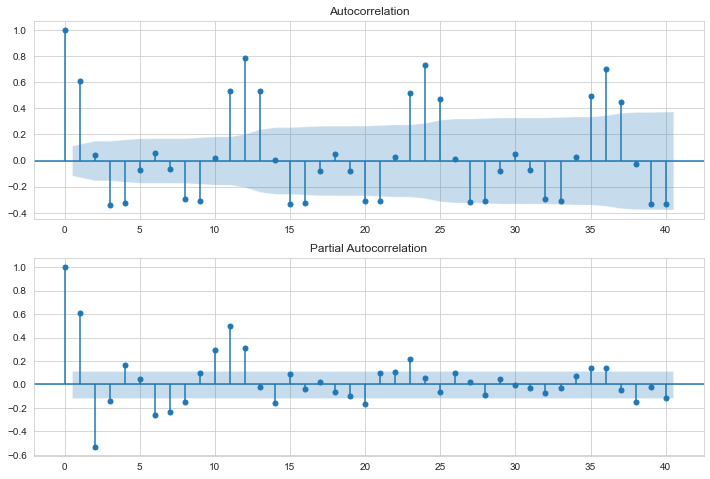

In [27]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

# autocorrelation plot
fig = sm.graphics.tsa.plot_acf(bom_monthly['AvgTemperature'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)

# partial autocorrelation plot
fig = sm.graphics.tsa.plot_pacf(bom_monthly['AvgTemperature'].iloc[13:],lags=40,ax=ax2)

In [28]:
# p - 2, d - 0, q - 1 
from statsmodels.tsa.arima_model import ARIMA

In [29]:
# training the arima model
model=ARIMA(bom_monthly['AvgTemperature'],order=(2,0,1))

# fitting the model
model_fit=model.fit()

In [30]:
# viewing the model summary 
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:         AvgTemperature   No. Observations:                  305
Model:                     ARMA(2, 1)   Log Likelihood                -651.241
Method:                       css-mle   S.D. of innovations              2.043
Date:                Wed, 15 Dec 2021   AIC                           1312.483
Time:                        12:34:14   BIC                           1331.084
Sample:                    01-31-1995   HQIC                          1319.923
                         - 05-31-2020                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   82.1154      0.183    448.102      0.000      81.756      82.475
ar.L1.AvgTemperature     1.0987      0.072     15.174      0.000       0.957       1.241
ar.L2.AvgTemperature    -0.6269      0.056    -11.186      0.000      -0.737      -0.517
ma.L1.AvgTemperature    -0.1738      0.086     -2.021      0.043      -0.342      -0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8763           -0.9095j            1.2630           -0.1280
AR.2            0.8763           +0.9095j            1.2630            0.1280
MA.1            5.7524           +0.0000j            5.7524            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

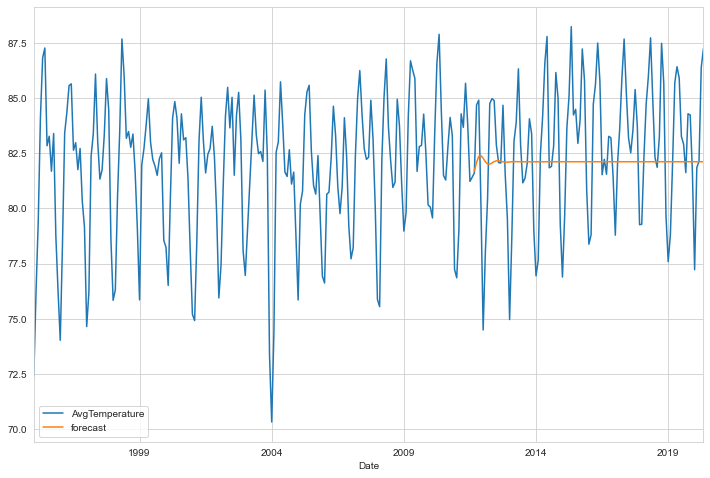

In [31]:
# predicting by setting start - end 
bom_monthly['forecast']=model_fit.predict(start=200,end=305,dynamic=True)

# plotting the actual and forecasted avg temperature
bom_monthly[['AvgTemperature','forecast']].plot(figsize=(12,8))

# What’s Wrong with ARIMA

Autoregressive Integrated Moving Average, or ARIMA, is a forecasting method for univariate time series data.

As its name suggests, it supports both an autoregressive and moving average elements. The integrated element refers to differencing allowing the method to support time series data with a trend.

A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle.

ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.

An alternative is to use SARIMA

# SARIMA -

How to use SARIMA in Python - 

The SARIMA time series forecasting method is supported in Python via the Statsmodels library.
To use SARIMA there are following steps, they are:

1. Define the model
2. Fit the defined model
3. Make a prediction with the fit model
4. Let’s look at each step in turn

In [32]:
# necessary imports
import statsmodels.api as sm

In [33]:
# sarima has order and seasonal order
model=sm.tsa.statespace.SARIMAX(bom_monthly['AvgTemperature'],order=(2,0,1),seasonal_order=(2,0,1,12))
# fittin the model
results=model.fit()

<AxesSubplot:xlabel='Date'>

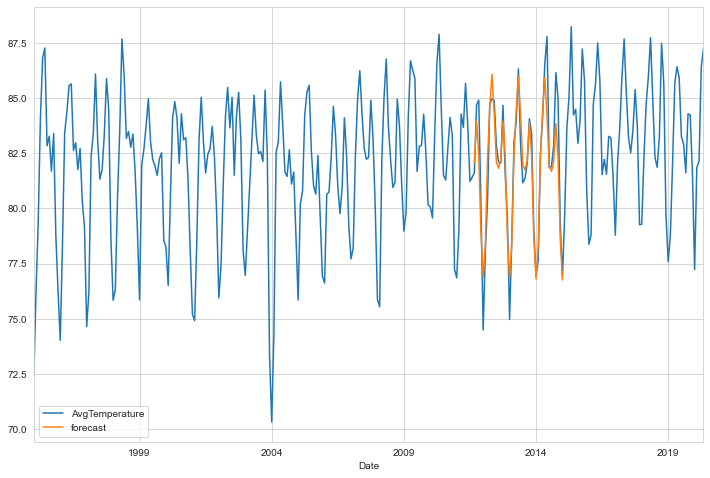

In [34]:
# predicting by setting start - end 
bom_monthly['forecast']=results.predict(start=200,end=240,dynamic=True)

# plotting the actual and forecasted avg temperature
bom_monthly[['AvgTemperature','forecast']].plot(figsize=(12,8))

In [35]:
from pandas.tseries.offsets import DateOffset

# forecasting for future dates
future_dates=[bom_monthly.index[-1]+ DateOffset(months=x)for x in range(0,120)]

In [36]:
# storing it in a dataframe
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=bom_monthly.columns)

In [37]:
future_df=pd.concat([bom_monthly,future_datest_df])

<AxesSubplot:>

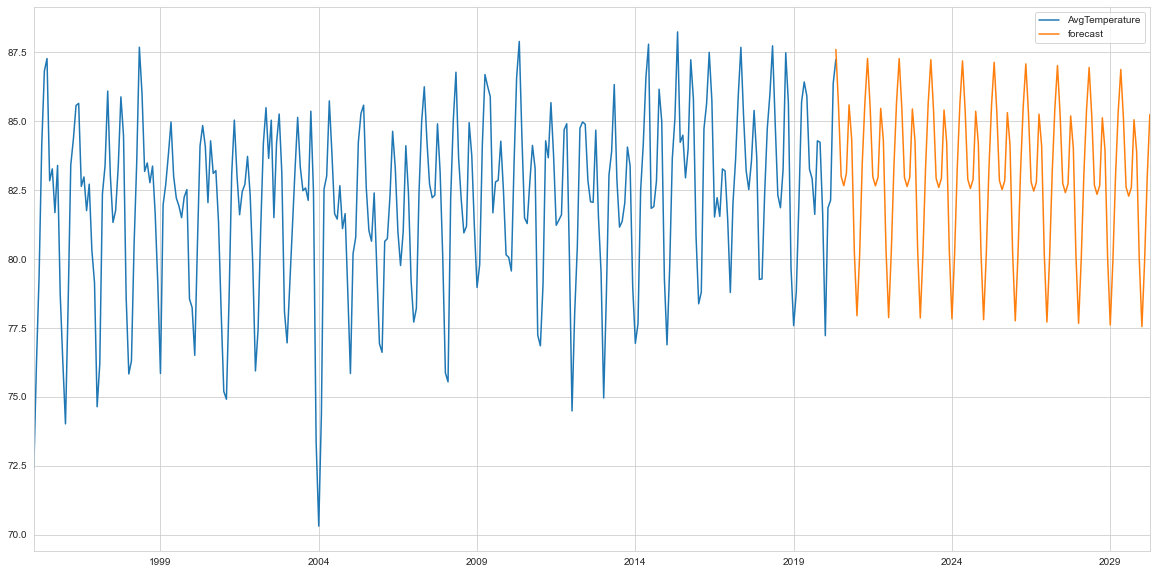

In [38]:
# predicting by setting start date - end date
future_df['forecast'] = results.predict(start = '2020-05-31', end = '2030-12-31', dynamic= True)
future_df[[ 'AvgTemperature','forecast']].plot(figsize=(20, 10))

In [39]:
# printing forecasted avg temperatures
future_df['forecast'].tail(20)

2028-09-30    82.665589
2028-10-31    85.122985
2028-11-30    83.963316
2028-12-31    80.052426
2029-01-31    77.611743
2029-02-28    79.927587
2029-03-31    83.002236
2029-04-30    85.315636
2029-05-31    86.872940
2029-06-30    85.095007
2029-07-31    82.609147
2029-08-31    82.280180
2029-09-30    82.598224
2029-10-31    85.051072
2029-11-30    83.892967
2029-12-31    79.988289
2030-01-31    77.551337
2030-02-28    79.862881
2030-03-31    82.931952
2030-04-30    85.241061
Name: forecast, dtype: float64

# ARIMA and SARIMA for Global data

Now let's forecast the Average global temperature of earth's surface after 10 years from now. Let's explore where we are heading!!

In [40]:
# repeating same steps as above 
data = pd.read_csv('/Users/janhavi/Desktop/citytemperature.csv')
data = data[data['AvgTemperature']>-50]
data.sort_values(['Year','Month','Day'])
data = data[['Month','Day','Year','AvgTemperature']]

In [41]:
# joining to get date
data['Date'] = data[['Year','Month','Day']].apply(lambda row:'-'.join([str(row['Year']),str(row['Month']),str(row['Day'])]),axis=1)
data['Date'] = pd.to_datetime(data['Date'])
data = data.drop(columns=['Month','Day','Year']).set_index('Date')
data.head(3)

AvgTemperature
Date                      
1995-01-01            64.2
1995-01-02            49.4
1995-01-03            48.8

In [42]:
# resampling with mean
data = data.resample('M').mean()
data.tail(5)

AvgTemperature
Date                      
2020-01-31       47.611256
2020-02-29       49.116942
2020-03-31       55.709877
2020-04-30       59.843723
2020-05-31       63.179968

In [43]:
# performing dickey fuller test to check if series is stationery or not
from statsmodels.tsa.stattools import adfuller

adf = adfuller(x=data['AvgTemperature'])
print('pvalue:',adf[1])
print('adf:',adf[0])
print('usedlag:',adf[2])
print('nobs:',adf[3])
print('critical_values:',adf[4])
print('icbest:',adf[5])

pvalue: 0.046353364336906504
adf: -2.891432721094334
usedlag: 14
nobs: 290
critical_values: {'1%': -3.453102162983312, '5%': -2.871558538275452, '10%': -2.5721082282996433}
icbest: 954.0782127817217


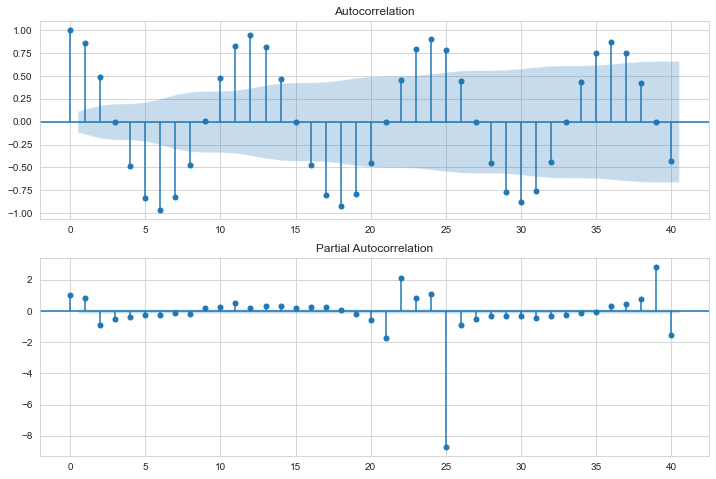

In [44]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# autocorrelation plot
fig = sm.graphics.tsa.plot_acf(data['AvgTemperature'].iloc[13:],lags=40,ax=ax1)
# partial autocorrelation plot
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['AvgTemperature'].iloc[13:],lags=40,ax=ax2)

# ARIMA

In [45]:
# arima model
model=ARIMA(data['AvgTemperature'],order=(3,0,1))

# fitting the model
model_fit=model.fit()

In [46]:
# checking the model summary for clear understanding
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:         AvgTemperature   No. Observations:                  305
Model:                     ARMA(3, 1)   Log Likelihood                -582.906
Method:                       css-mle   S.D. of innovations              1.618
Date:                Wed, 15 Dec 2021   AIC                           1177.813
Time:                        12:34:47   BIC                           1200.135
Sample:                    01-31-1995   HQIC                          1186.741
                         - 05-31-2020                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   60.4082      0.119    506.210      0.000      60.174      60.642
ar.L1.AvgTemperature     1.4188      0.065     21.782      0.000       1.291       1.546
ar.L2.AvgTemperature    -0.4645      0.112     -4.152      0.000      -0.684      -0.245
ar.L3.AvgTemperature    -0.3016      0.065     -4.671      0.000      -0.428      -0.175
ma.L1.AvgTemperature    -0.5563      0.046    -12.187      0.000      -0.646      -0.467
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8708           -0.5022j            1.0052           -0.0833
AR.2            0.8708           +0.5022j            1.0052            0.0833
AR.3           -3.2816           -0.0000j            3.2816           -0.5000
MA.1            1.7975           +0.0000j            1.7975            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

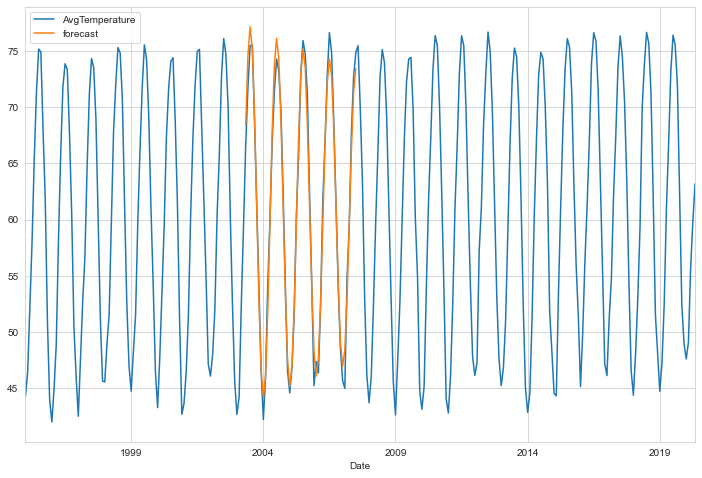

In [47]:
# predecting from start - end
data['forecast']=model_fit.predict(start=100,end=150,dynamic=True)
data[['AvgTemperature','forecast']].plot(figsize=(12,8))

In [48]:
# forecasting future avg temperature
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,120)]

In [49]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [50]:
future_df=pd.concat([data,future_datest_df])
future_df

AvgTemperature  forecast
1995-01-31       44.280643       NaN
1995-02-28       46.442394       NaN
1995-03-31       52.285403       NaN
1995-04-30       58.003693       NaN
1995-05-31       65.412241       NaN
...                    ...       ...
2029-12-31             NaN       NaN
2030-01-31             NaN       NaN
2030-02-28             NaN       NaN
2030-03-31             NaN       NaN
2030-04-30             NaN       NaN

[424 rows x 2 columns]

<AxesSubplot:>

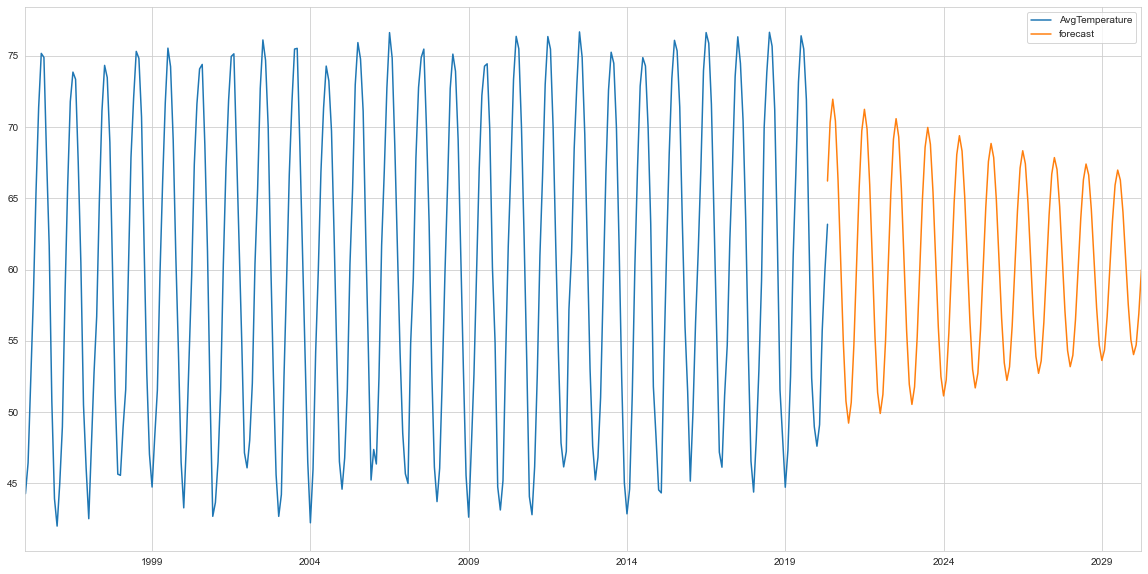

In [51]:
# predecting from 2020 - 2030 avg temperature
future_df['forecast'] = model_fit.predict(start = '2020-05-31', end = '2030-12-31', dynamic= True)
future_df[[ 'AvgTemperature','forecast']].plot(figsize=(20, 10)) 

In [52]:
# printing the values
future_df['forecast'].tail(5)

2029-12-31    55.071164
2030-01-31    54.038706
2030-02-28    54.712155
2030-03-31    56.894661
2030-04-30    59.989771
Name: forecast, dtype: float64

# SARIMA

In [53]:
# sarima model
model=sm.tsa.statespace.SARIMAX(data['AvgTemperature'],order=(3,0,1),seasonal_order=(3,0,1,12))
# fitting the data
results=model.fit()

/Users/janhavi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<AxesSubplot:xlabel='Date'>

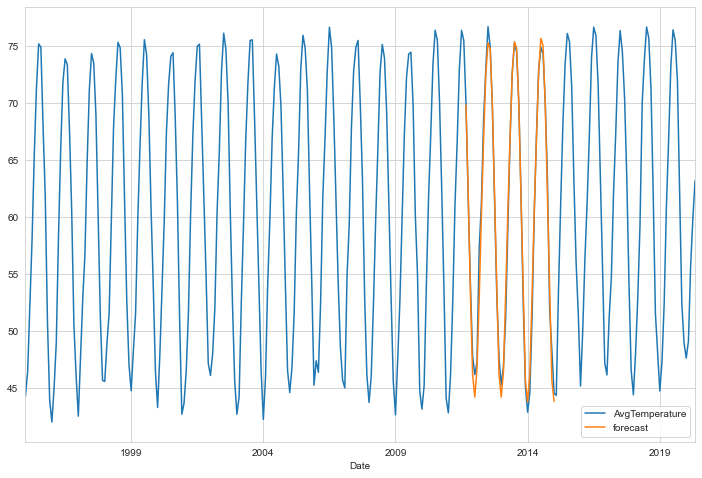

In [54]:
# forecasting from start - end
data['forecast']=results.predict(start=200,end=240,dynamic=True)
data[['AvgTemperature','forecast']].plot(figsize=(12,8))

In [55]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,120)]

In [56]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [57]:
future_datest_df.tail()

AvgTemperature forecast
2029-12-31            NaN      NaN
2030-01-31            NaN      NaN
2030-02-28            NaN      NaN
2030-03-31            NaN      NaN
2030-04-30            NaN      NaN

In [58]:
future_df=pd.concat([data,future_datest_df])
future_df

AvgTemperature  forecast
1995-01-31       44.280643       NaN
1995-02-28       46.442394       NaN
1995-03-31       52.285403       NaN
1995-04-30       58.003693       NaN
1995-05-31       65.412241       NaN
...                    ...       ...
2029-12-31             NaN       NaN
2030-01-31             NaN       NaN
2030-02-28             NaN       NaN
2030-03-31             NaN       NaN
2030-04-30             NaN       NaN

[424 rows x 2 columns]

<AxesSubplot:>

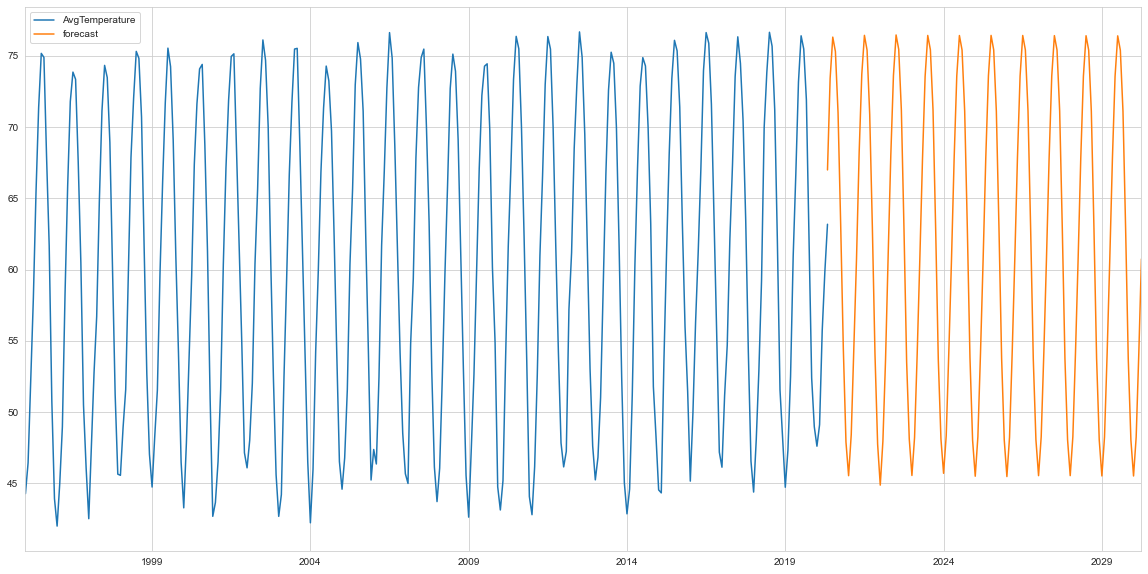

In [59]:
# forecasting from 2020 - 2031
future_df['forecast'] = results.predict(start = '2020-05-31', end = '2030-12-31', dynamic= True)
future_df[[ 'AvgTemperature','forecast']].plot(figsize=(20, 10)) 

In [60]:
# printing the results
future_df['forecast'].tail(5)

2029-12-31    48.044774
2030-01-31    45.522102
2030-02-28    48.253190
2030-03-31    54.148221
2030-04-30    60.747077
Name: forecast, dtype: float64

# Conclusion

Average Temperature in April 2020 is 59.84 while according to our forecasting Average temperature in April 2030 is 60.74 which is an alraming increase of about 1 degree. So we conclude that if we  if not (jokes apart) Now many of you won't be able to go Maldives (going to miss those beautiful sea beaches with blue water) or going to miss those white snow covered Alps on for your honeymoon !!
It is the high time that we should take steps to prevent any more environment damage, otherwise the results will be horiffic

<img src="https://media4.giphy.com/media/WpaVhEcp3Qo2TjwyI1/giphy.gif?cid=ecf05e47c6helg0u1jx04qjm46z7f7knqnpebkr4m9n7bxbw&rid=giphy.gif&ct=g" width="400" height="400" />

# Thank You !!